In [1]:
# TODOS
# Multiplikation - 0 zu 1 werden lassen

In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np 

number_entries = 10                                         # Anzahl der Spieler (y-Achse im Bild)
number_iterations = 10                                      # Anzahl der Evolutionen (x-Achse im Bild)
number_variables = 2                                        # Anzahl der zu berücksichtigenden Faktoren
temp = 'a'                                                  # additives 'a' oder multiplikatives 'm' Verhältnis der Faktoren zueinander
additiv = temp == 'a'
#fs_max_min = [[160,200],[-3,3],[-20,0],[0,15],[-1,1]]
fs_max_min = [[160,200],[-20,0]]                            # Minimum und Maximum eines jeden Faktors
intervene_var = 2                                           # Angabe, welche der Variablen minimiet werden soll
diminished_faktor = 0.7                                     # Verringerungsfaktor
random_val_min = -1                                         # Randomisierer Minimum
random_val_max = 1                                          # Randomisierer Maximum

In [3]:
############################################################################
#-----------------------Variableninput über Eingabe------------------------#
############################################################################

#number_variables = int(input("Anzahl berücksichtigter Faktoren (mindestens 2)"))
#intervene_var = int(input("Der wievielte ist der sich verringernde Faktor?")) 
#diminished_faktor = float(input("Um welchen Faktor soll sich der Wert verringern (Zahl zwischen 0 und 1, z.B. 0.5)?"))
#temp = input("Stehen die Variablen in einem multiplikativen (m) oder in einer additiven (a) Verhältnis? (m/a)")
#additiv = temp == 'a'
#fs_max_min = []
#for i in range(number_variables):
#    val_min = int(input(f"Minimaler Wert für Faktor {i+1}: "))
#    val_max = int(input(f"Maximaler Wert für Faktor {i+1}: "))
#    fs_max_min.append([val_min, val_max])
#number_entries = int(input("Anzahl der Fälle: "))
#number_iterations = int(input("Anzahl der Generationen: "))
#random_val_min = int(input("Randomisierer Minimum"))
#random_val_max = int(input("Randomisierer Maximum"))#

##Wertekontrolle
#print("\n___Zusammenfassung der Eingaben___")#

#print(f"Anzahl der berücksichtigten Faktoren: {number_variables}")
#print(f"Sich verringernder Faktor: Faktor {intervene_var}")
#print(f"Verringerungsfaktor: {diminished_faktor}")        
#print("Wertbereiche der Faktoren (Min/Max):")
#for idx, (vmin, vmax) in enumerate(fs_max_min, start=1):
#    print(f"  Faktor {idx}: Min = {vmin}, Max = {vmax}")
#print(f"Anzahl der Fälle: {number_entries}")
#print(f"Anzahl der Evolutionen: {number_iterations}")
#print(f"Randomisierer Minimum: {random_val_min}")          
#print(f"Randomisierer Maximum: {random_val_max}")          

In [4]:
# game setup
# Daten für die initiale Generation werden erzeugt. Die Werte werden zufällig in den oben begrenzten Bereich erzeugt.

data_temp = [] #Variablen id, [fs], random_val

def number_to_letters(n):
    result = ''
    while n >= 0:
        result = chr(n % 26 + 65) + result
        n = n // 26 - 1
        if n < 0:
            break
    return result
def multiply_values(values):
    result = 1
    for v in values:
        result *= v
    return result
# generate data
count = 0
for i in range(number_entries):
    tempfs = []
    for f in fs_max_min:
        tempfs.append(random.randint(f[0], f[1]))
    data_temp.append([number_to_letters(count),
                      *tempfs,
                      random.randint(random_val_min, random_val_max)])
    count += 1

if additiv:    
    data_firstgen = sorted(data_temp, 
                       key=lambda x: sum(x[1:number_variables+1]), 
                       reverse=True)
else:
    data_firstgen = sorted(data_temp, 
                       key=lambda x: multiply_values(x[1:number_variables+1]), 
                       reverse=True)

In [5]:
# Werte der initialen Generation
print(data_firstgen)

[['G', 190, -5, -1], ['A', 188, -8, 0], ['C', 184, -8, 0], ['H', 190, -15, 1], ['I', 172, -2, 0], ['D', 182, -13, 1], ['E', 181, -12, 0], ['J', 176, -14, -1], ['F', 168, -9, 0], ['B', 162, -17, 1]]


In [6]:
# Funktion: die evolutionen werden aus den initialen Werten generiert. Die Interventionsvariable wird verringert. Der Zufallsfaktor wird für mehr Varianz neu vergeben.
import copy
def make_children(iterations, data, hist = None):
    if hist is None:
        hist = []
        for d in data:
            if additiv:
                f = lambda x: sum(x[1:number_variables+2])
            else:
                f = lambda x: sum(x[1:number_variables+2])
            d.append(f(d))
        hist.append(data)
    if iterations == 0:
        return hist
    else:
        iterations -= 1
        temp = []
        for tt in data:
            child = [tt[0]]
            for i in range(1, number_variables + 2):
                if i == intervene_var:
                    child.append(round(tt[i] * diminished_faktor, 2))
                elif i == number_variables+1:
                    child.append(random.randint(random_val_min, random_val_max))
                else:
                    child.append(tt[i])
            if not additiv:
                f = lambda x: multiply_values(x[1:number_variables+2])
            else:
                f = lambda x: sum(x[1:number_variables+2])
            child.append(copy.deepcopy(f(child)))
            temp.append(copy.deepcopy(child))
        hist.append(sorted((temp), key=lambda x: x[-1], reverse=True))
        if additiv:
            #temp.append(sum(temp[1:number_variables+2]))
            #hist.append(sorted(temp, key=lambda x: sum(x[1:number_variables+1]), reverse=True))
            return make_children(iterations, temp, hist)
        else:
            #temp.append(multiply_values(temp[1:number_variables+2]))
            #hist.append(sorted(temp, key=lambda x: multiply_values(x[1:number_variables+1]), reverse=True))
            return make_children(iterations, temp, hist)

# Ausführen der obigen Funktion
evolution = make_children(number_iterations, data_firstgen)

In [7]:
# Erzeugte Daten: 
#    erste Dimension des Arrays: Evolution
#    zweite Dimension des Arrays: Werte [Bezeichner, Unveränderlicher Wert, Faktoren, Summe des Wertes und der Faktoren]
print(evolution)

[[['G', 190, -5, -1, 184], ['A', 188, -8, 0, 180], ['C', 184, -8, 0, 176], ['H', 190, -15, 1, 176], ['I', 172, -2, 0, 170], ['D', 182, -13, 1, 170], ['E', 181, -12, 0, 169], ['J', 176, -14, -1, 161], ['F', 168, -9, 0, 159], ['B', 162, -17, 1, 146]], [['G', 190, -3.5, 0, 186.5], ['A', 188, -5.6, -1, 181.4], ['H', 190, -10.5, 0, 179.5], ['C', 184, -5.6, 0, 178.4], ['D', 182, -9.1, 0, 172.9], ['E', 181, -8.4, 0, 172.6], ['I', 172, -1.4, 1, 171.6], ['J', 176, -9.8, -1, 165.2], ['F', 168, -6.3, 0, 161.7], ['B', 162, -11.9, 1, 151.1]], [['G', 190, -2.45, 1, 188.55], ['A', 188, -3.92, 1, 185.08], ['H', 190, -7.35, 1, 183.65], ['C', 184, -3.92, 1, 181.08], ['D', 182, -6.37, 0, 175.63], ['E', 181, -5.88, -1, 174.12], ['J', 176, -6.86, 1, 170.14], ['I', 172, -0.98, -1, 170.02], ['F', 168, -4.41, 1, 164.59], ['B', 162, -8.33, 0, 153.67]], [['G', 190, -1.72, 1, 189.28], ['A', 188, -2.74, 1, 186.26], ['H', 190, -5.14, 0, 184.86], ['C', 184, -2.74, 1, 182.26], ['D', 182, -4.46, 0, 177.54], ['E', 181

In [ ]:
# aus erzeugten Daten werden die für die Darstellung relevanten extrahiert, der Rang wird ermittelt: [Bezeichner, Summenwert, Rang]
mobility=[]
for ev in evolution:
    count = 0
    mb = []
    for item in ev:
        temp = [item[0],item[-1],count]
        count += 1
        mb.append(temp)
    mobility.append(mb)

In [ ]:
# Rangfolgenwechsel wird ermittelt und zu den Daten ergänzt
for i in range(len(mobility)-1):
    i_current = 0
    if i == 0:
        for temp in range(len(mobility[i])):
            mobility[0][temp].append(0)
    for t_current in mobility[i+1]:
        for t_before in mobility[i]:
            if t_current[0] == t_before[0]:
                mobility[i+1][i_current].append(t_before[2] - t_current[2])
                break
        i_current += 1
print(mobility)

[[['G', 184, 0, 0], ['A', 180, 1, 0], ['C', 176, 2, 0], ['H', 176, 3, 0], ['I', 170, 4, 0], ['D', 170, 5, 0], ['E', 169, 6, 0], ['J', 161, 7, 0], ['F', 159, 8, 0], ['B', 146, 9, 0]], [['G', 186.5, 0, 0], ['A', 181.4, 1, 0], ['H', 179.5, 2, 1], ['C', 178.4, 3, -1], ['D', 172.9, 4, 1], ['E', 172.6, 5, 1], ['I', 171.6, 6, -2], ['J', 165.2, 7, 0], ['F', 161.7, 8, 0], ['B', 151.1, 9, 0]], [['G', 188.55, 0, 0], ['A', 185.08, 1, 0], ['H', 183.65, 2, 0], ['C', 181.08, 3, 0], ['D', 175.63, 4, 0], ['E', 174.12, 5, 0], ['J', 170.14, 6, 1], ['I', 170.02, 7, -1], ['F', 164.59, 8, 0], ['B', 153.67, 9, 0]], [['G', 189.28, 0, 0], ['A', 186.26, 1, 0], ['H', 184.86, 2, 0], ['C', 182.26, 3, 0], ['D', 177.54, 4, 0], ['E', 175.88, 5, 0], ['I', 172.31, 6, 1], ['J', 172.2, 7, -1], ['F', 163.91, 8, 0], ['B', 157.17, 9, 0]], [['G', 189.8, 0, 0], ['H', 187.4, 1, 1], ['A', 185.08, 2, -1], ['C', 183.08, 3, 0], ['D', 178.88, 4, 0], ['E', 178.12, 5, 0], ['J', 173.64, 6, 1], ['I', 171.52, 7, -1], ['F', 166.84, 8, 0]

In [ ]:
# Rangfolgenwechsel wird normalisiert (nach vorherigem Quadrieren, um Abstände deutlicher zu machen), damit es später farblich dargestellt werden kann

mobility_normalized = [[item[:] for item in entry] for entry in mobility]

for x in range(len(mobility_normalized)):
    for y in range(len(mobility_normalized[x])):
        if mobility_normalized[x][y][-1] < 0:
            mobility_normalized[x][y][-1] = copy.deepcopy((mobility_normalized[x][y][-1]**2)*-1)
        else:
            mobility_normalized[x][y][-1] = copy.deepcopy((mobility_normalized[x][y][-1]**2))
            

values_to_normalize = np.array([(item[-1]) for entry in mobility_normalized for item in entry])

max_value = np.array([abs(item[-1]) for entry in mobility_normalized for item in entry]).max()
min_value = max_value * (-1)
if max_value != min_value:
    a = -1
    b = 1
    normalized_values = a + (values_to_normalize - min_value) * (b - a) / (max_value - min_value)##

    # Werte zurückschreiben
    i = 0
    for entry in mobility_normalized:
        for item in entry:
            if item[-1] != 0:
                item[-1] = float(normalized_values[i])
            i += 1


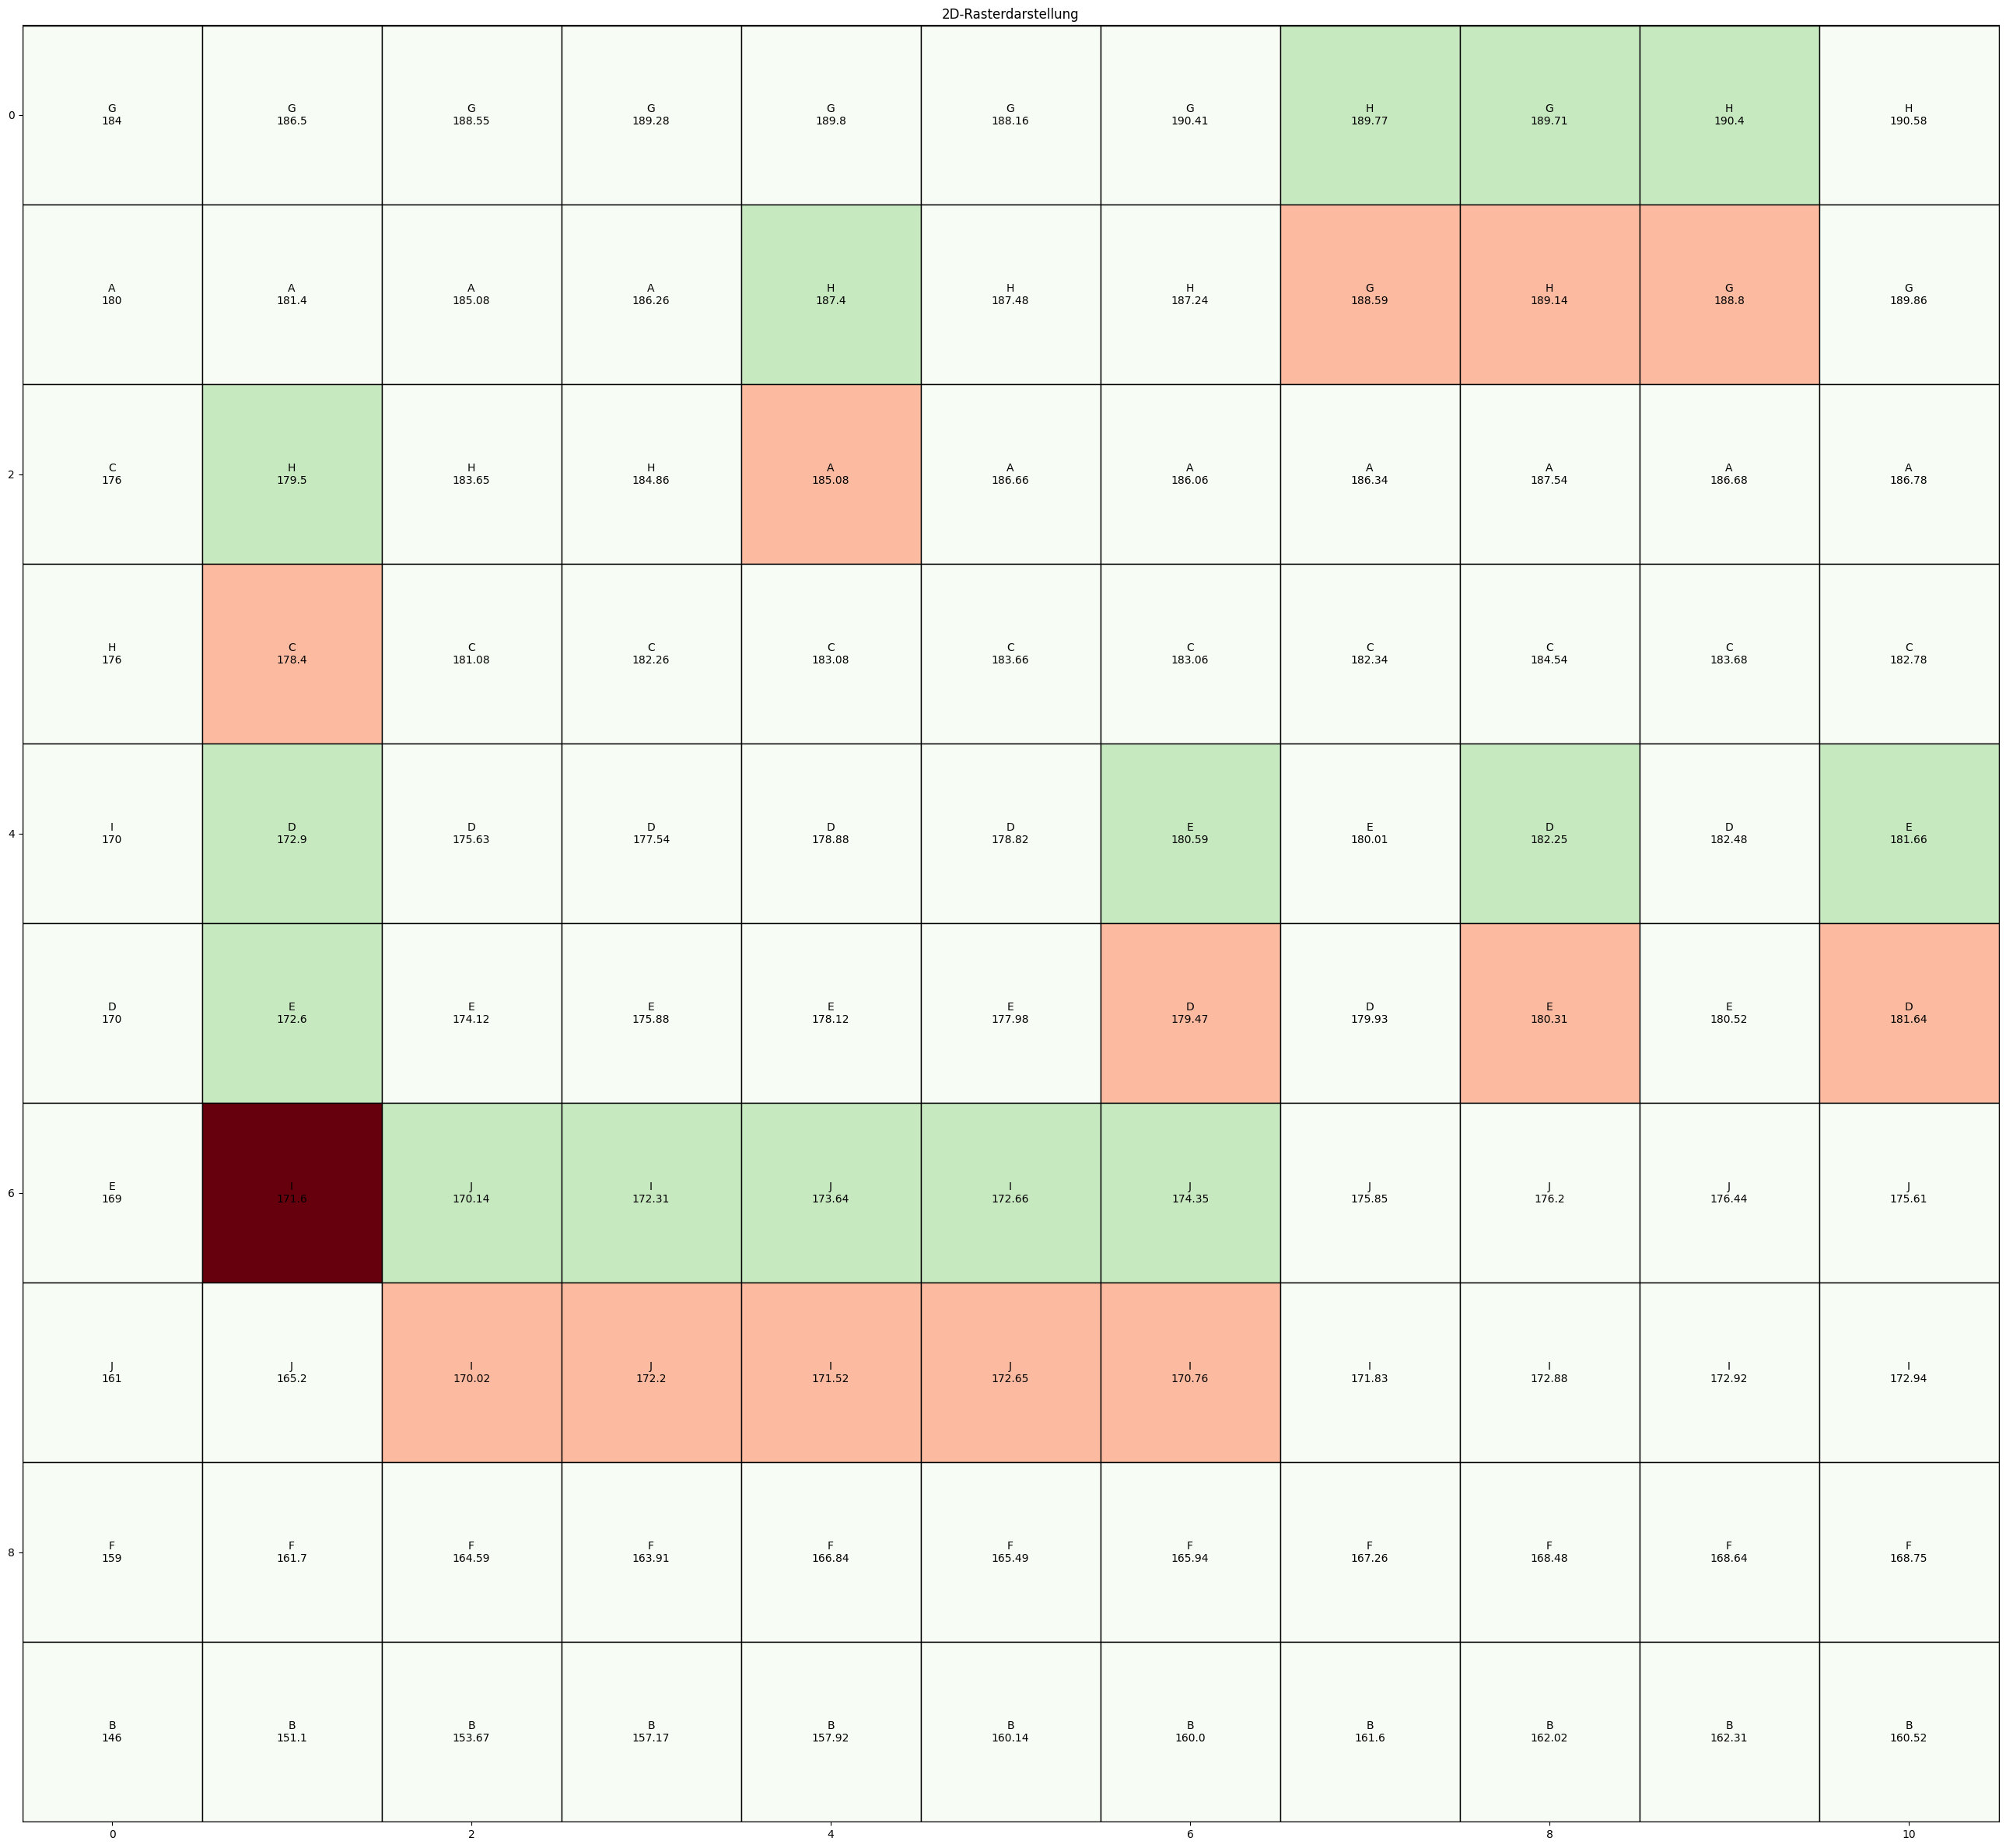

In [ ]:
# aus Daten wird Bild

x_size=len(mobility_normalized) # Anzahl der Einträge (Generationen)
#print(x_size)
y_size=len(mobility_normalized[0]) # Anzahl des Samples
#print(y_size)

fig, ax = plt.subplots(figsize=(70, 30)) # hier Größe des Plots ändern!!1!!!11!!! (breite, höhe)
ax.set_title("2D-Rasterdarstellung")

# Achsen anpassen
ax.set_xlim(-0.5, x_size - 0.5)
ax.set_ylim(-0.5, y_size - 0.5)
ax.invert_yaxis()  # Damit (0,0) oben links ist
ax.set_aspect('equal')

def get_color(value):
    # für Aufstieg grün, für Abstieg rot
    if value >= 0:
        # Skalierung von 0 (grün) bis 1 (intensiver grün)
        color = plt.cm.Greens(value)  # Verwende die Greens Colormap
    else:
        # Skalierung von 0 (rot) bis -1 (intensiver rot)
        color = plt.cm.Reds(-value)   # Verwende die Reds Colormap, negiere den Wert
    return color

for x in range(x_size):
    for y in range(y_size):
        name = mobility_normalized[x][y][0] + "\n" + str(mobility[x][y][1])
        color_n = mobility_normalized[x][y][-1]
        
        rect = plt.Rectangle((x - 0.5, y - 0.5), 1, 1, color=get_color(color_n), ec='black')
        ax.add_patch(rect)
        ax.text(x, y, name, ha='center', va='center', fontsize=10, color='black')
for y in range(0, y_size, 10):
    ax.hlines(y - 0.5, xmin=-0.5, xmax=x_size - 0.5, colors='black', linewidth=2.5)
plt.show()

In [ ]:
# berechne, wie viel Bewegung es in jeder Evolution gab

total_sum_per_iteration = ([sum(abs(entry[-1]) for entry in generation) for generation in mobility])
print(total_sum_per_iteration)

[0, 6, 2, 2, 4, 2, 4, 2, 4, 2, 2]
